In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

### Warm-Up Problems

...Add warmup problems here...

## Day 23: Diagonalization, Similarity, and Matrix Powers

Consider the matrix $A = \begin{bmatrix} 3 & 0\\ 0 & -1\end{bmatrix}$ and the matrix $B = \begin{bmatrix} 1 & 2\\ 2 & 1\end{bmatrix}$. We'll consider how the matrix $A$ acts on the vectors $\vec{e_1} = \begin{bmatrix} 1\\ 0\end{bmatrix}$ and $\vec{e_2} = \begin{bmatrix} 0\\ 1\end{bmatrix}$ as well as how the matrix $B$ acts on the vectors $\vec{v_1} = \begin{bmatrix} 1\\ 1\end{bmatrix}$ and $\vec{v_2} = \begin{bmatrix} -1\\ 1\end{bmatrix}$. In particular, we'll consider the parallelograms resulting from the vectors $A\vec{e_1}$ and $A\vec{e_2}$ as well as the vectors $B\vec{v_1}$ and $B\vec{v_2}$.

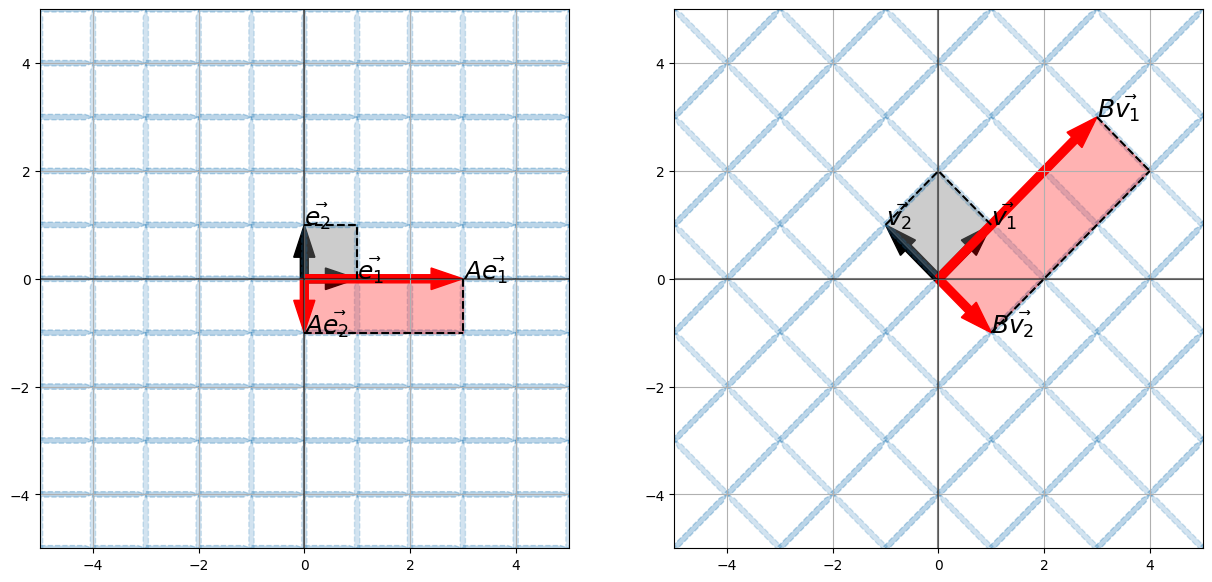

In [4]:
#@title
e1 = np.array([1.0, 0])
e2 = np.array([0.0, 1])
v1 = np.array([1.0, 1])
v2 = np.array([-1.0, 1])

A = np.array([[3.0, 0], [0, -1]])
B = np.array([[1.0, 2], [2, 1]])

Ae1 = np.matmul(A, e1)
Ae2 = np.matmul(A, e2)
Bv1 = np.matmul(B, v1)
Bv2 = np.matmul(B, v2)

plt.figure(figsize = (15, 7))

plt.subplot(1, 2, 1)
plt.grid()
plt.axvline(x = 0, color = "black", alpha = 0.5)
plt.axhline(y = 0, color = "black", alpha = 0.5)
plt.arrow(0, 0, e1[0], e1[1], length_includes_head = True, width = 0.15, head_width = 0.4, color = "black")
plt.arrow(0, 0, e2[0], e2[1], length_includes_head = True, width = 0.15, head_width = 0.4, color = "black")
plt.fill([0, e1[0], e1[0] + e2[0], e2[0]], [0, e1[1], e1[1] + e2[1], e2[1]], color="grey", alpha = 0.4)
plt.plot([e1[0], e1[0] + e2[0], e2[0]], [e1[1], e1[1] + e2[1], e2[1]], color = "black", ls = "--")

for i in range(-7, 8):
  for j in range(-7, 8):
    curr_loc = np.array([i*e1[0] + j*e2[0], i*e1[1] + j*e2[1]])
    plt.arrow(curr_loc[0], curr_loc[1], e1[0], e1[1], length_includes_head = True, width = 0.1, head_width = 0.1, color = "C0", ls = "--", alpha = 0.3)
    plt.arrow(curr_loc[0], curr_loc[1], e2[0], e2[1], length_includes_head = True, width = 0.1, head_width = 0.1, color = "C0", ls = "--", alpha = 0.2)

plt.arrow(0, 0, Ae1[0], Ae1[1], length_includes_head = True, width = 0.15, head_width = 0.4, color = "red")
plt.arrow(0, 0, Ae2[0], Ae2[1], length_includes_head = True, width = 0.15, head_width = 0.4, color = "red")
x_coords_A = [0, Ae1[0], Ae1[0] + Ae2[0], Ae2[0]]
y_coords_A = [0, Ae1[1], Ae1[1] + Ae2[1], Ae2[1]]
plt.fill(x_coords_A, y_coords_A, color='red', alpha=0.3)

plt.annotate(r"$\vec{e_1}$", (e1[0], e1[1]), fontsize = 18)
plt.annotate(r"$\vec{e_2}$", (e2[0], e2[1]), fontsize = 18)
plt.annotate(r"$A\vec{e_1}$", (Ae1[0], Ae1[1]), fontsize = 18)
plt.annotate(r"$A\vec{e_2}$", (Ae2[0], Ae2[1]), fontsize = 18)
plt.plot([Ae1[0], Ae1[0] + Ae2[0]], [Ae1[1], Ae1[1] + Ae2[1]], color = "black", ls = "--")
plt.plot([Ae2[0], Ae2[0] + Ae1[0]], [Ae2[1], Ae2[1] + Ae1[1]], color = "black", ls = "--")

plt.xlim((-5, 5))
plt.ylim((-5, 5))

plt.subplot(1, 2, 2)
plt.grid()
plt.axvline(x = 0, color = "black", alpha = 0.5)
plt.axhline(y = 0, color = "black", alpha = 0.5)
plt.arrow(0, 0, v1[0], v1[1], length_includes_head = True, width = 0.15, head_width = 0.4, color = "black")
plt.arrow(0, 0, v2[0], v2[1], length_includes_head = True, width = 0.15, head_width = 0.4, color = "black")
plt.fill([0, v1[0], v1[0] + v2[0], v2[0]], [0, v1[1], v1[1] + v2[1], v2[1]], color="grey", alpha = 0.4)
plt.plot([v1[0], v1[0] + v2[0], v2[0]], [v1[1], v1[1] + v2[1], v2[1]], color = "black", ls = "--")

#vals = np.linspace(-6, 6)
#x1_ax2 = len(vals)*[0]
#x2_ax2 = vals
#plt.grid()
#plt.plot(vals, x1_ax2, color = "black", alpha = 0.5)
#plt.plot(vals, x2_ax2, color = "black", alpha = 0.5)

for i in range(-7, 8):
  for j in range(-7, 8):
    curr_loc = np.array([i*v1[0] + j*v2[0], i*v1[1] + j*v2[1]])
    plt.arrow(curr_loc[0], curr_loc[1], v1[0], v1[1], length_includes_head = True, width = 0.1, head_width = 0.1, color = "C0", ls = "--", alpha = 0.3)
    plt.arrow(curr_loc[0], curr_loc[1], v2[0], v2[1], length_includes_head = True, width = 0.1, head_width = 0.1, color = "C0", ls = "--", alpha = 0.2)

plt.arrow(0, 0, Bv1[0], Bv1[1], length_includes_head = True, width = 0.15, head_width = 0.4, color = "red")
plt.arrow(0, 0, Bv2[0], Bv2[1], length_includes_head = True, width = 0.15, head_width = 0.4, color = "red")
x_coords_B = [0, Bv1[0], Bv1[0] + Bv2[0], Bv2[0]]
y_coords_B = [0, Bv1[1], Bv1[1] + Bv2[1], Bv2[1]]
plt.fill(x_coords_B, y_coords_B, color='red', alpha=0.3)

plt.annotate(r"$\vec{v_1}$", (v1[0], v1[1]), fontsize = 18)
plt.annotate(r"$\vec{v_2}$", (v2[0], v2[1]), fontsize = 18)
plt.annotate(r"$B\vec{v_1}$", (Bv1[0], Bv1[1]), fontsize = 18)
plt.annotate(r"$B\vec{v_2}$", (Bv2[0], Bv2[1]), fontsize = 18)
plt.plot([Bv1[0], Bv1[0] + Bv2[0]], [Bv1[1], Bv1[1] + Bv2[1]], color = "black", ls = "--")
plt.plot([Bv2[0], Bv2[0] + Bv1[1]], [Bv2[1], Bv2[1] + Bv1[1]], color = "black", ls = "--")

plt.xlim((-5, 5))
plt.ylim((-5, 5))

plt.show()

Notice that the matrix $A = \begin{bmatrix} 3 & 0\\ 0 & -1\end{bmatrix}$ stretches vectors in the direction of $\vec{e_1}$ by $3$ and flips vectors in the opposite direction of $\vec{e_2}$. Similarly, the matrix $B = \begin{bmatrix} 1 & 2\\ 2 & 1\end{bmatrix}$ stretches vectors in the $\vec{v_1}$ direction by $3$ and flips vectors in the opposite direction of $\vec{v_2}$. This must mean that, at least in some sense, the matrices $A$ and $B$ are related. The matrix $B$ does what the matrix $A$ does, just in a different basis.

Is the observed relationship between the matrices $A$ and $B$ coincidence? Is it luck? Given some generic matrix like $B$, can we obtain a convenient matrix like $A$ which has analogous geometric effects to $B$, but where those geometric effects are easily identified? When, and how, is such a discovery possible?

### Prerequisite Reminders

We'll be combining a few ideas that we haven't referenced for a while (and some that we've seen quite recently). Reiterating them below will be helpful.

1. We can think of matrix-vector multiplication $A\vec{x}$ as calculating a linear combination of the columns of the matrix. Remember that

$$\begin{bmatrix} \vec{a_1} & \vec{a_2} & \cdots & \vec{a_n}\end{bmatrix}\begin{bmatrix} x_1\\ x_2\\ \vdots\\ x_n\end{bmatrix} = \begin{bmatrix} x_1\vec{a_1} + x_2\vec{a_2} + \cdots + x_n\vec{a_n}\end{bmatrix}$$

2. We can think of matrix multiplication $BA$ as a transformation of the columns of the matrix $A$. Remember that

$$B\begin{bmatrix} \vec{a_1} & \vec{a_2} & \cdots & \vec{a_n}\end{bmatrix} = \begin{bmatrix} B\vec{a_1} & B\vec{a_2} & \cdots & B\vec{a_n}\end{bmatrix}$$

3. The non-zero vector $\vec{v}$ is an eigenvector of the matrix $A$ if $A\vec{v} = \lambda \vec{v}$ for some $\lambda$. Remember that, with eigenvectors, matrix multiplication is simplified to just scalar multiplication.

4. If a matrix has $n$ distinct eigenvalues, then it is possible to find a basis for $\mathbb{R}^n$ consisting of eigenvalues. We often call this an *eigenbasis*. There are lots of scenarios other than this one where the existence of an *eigenbasis* can be guaranteed. In this notebook, we'll simply assume that we are in such a scenario.

### Diagonalization

Let's suppose we have an $n\times n$ matrix $A$ and a corresponding basis for $\mathbb{R}^n$ consisting of eigenvectors of $A$. We'll call those eigenvectors $\vec{v_1},~\vec{v_2},~\cdots,~\vec{v_n}$ and their corresponding eigenvalues $\lambda_1,~\lambda_2,~\cdots,~\lambda_n$ for convenience.

> **Example:** As you read through the discussion below, use the matrix $A = \begin{bmatrix} -3 & 6\\ 3 & 0\end{bmatrix}$ which has eigenvectors $\vec{v_1} = \begin{bmatrix} 1\\ 1\end{bmatrix}$ and $\vec{v_2} = \begin{bmatrix} 2\\ -1\end{bmatrix}$, with corresponding eigenvalues $\lambda_1 = 3$ and $\lambda_2 = -6$ to follow along and verify.

Consider the matrix $P = \begin{bmatrix} \vec{v_1} & \vec{v_2} & \cdots & \vec{v_n}\end{bmatrix}$ and examine the product $AP$.

\begin{align} AP &= A\begin{bmatrix} \vec{v_1} & \vec{v_2} & \cdots & \vec{v_n}\end{bmatrix}\\
&\stackrel{\text{by 2 above}}{=} \begin{bmatrix} A\vec{v_1} & A\vec{v_2} & \cdots & A\vec{v_n}\end{bmatrix}\\
&\stackrel{\text{by eigen*}}{=} \begin{bmatrix} \lambda_1\vec{v_1} & \lambda_2\vec{v_2} & \cdots & \lambda_n\vec{v_n}\end{bmatrix}
\end{align}

Similarly, consider the diagonal matrix $D = \begin{bmatrix} \lambda_1 & 0 & \cdots & 0\\
0 & \lambda_2 & \cdots & 0\\
\vdots & \vdots & \ddots & \vdots\\
0 & 0 & \cdots & \lambda_n\end{bmatrix}$ and the product $PD$.

\begin{align} PD &= \begin{bmatrix} \vec{v_1} & \vec{v_2} & \cdots & \vec{v_n}\end{bmatrix}\begin{bmatrix} \lambda_1 & 0 & \cdots & 0\\
0 & \lambda_2 & \cdots & 0\\
\vdots & \vdots & \ddots & \vdots\\
0 & 0 & \cdots & \lambda_n\end{bmatrix}\\
&\stackrel{}{=} \begin{bmatrix} \lambda_1\vec{v_1} & \lambda_2\vec{v_2} & \cdots & \lambda_n\vec{v_n}\end{bmatrix}
\end{align}

The two observations above allow us to claim that $AP = PD$. Now, since the columns of $P$ form a basis, we know that those columns are linearly independent, and $P$ has a pivot in every row/column. This means than $P$ is invertible. This allows us to arrive at the following:

\begin{align} AP &= PD\\
\implies APP^{-1} &= PDP^{-1}\\
\implies AI &= PDP^{-1}\\
\implies A &= PDP^{-1}
\end{align}

We call $PDP^{-1}$ the diagonalization of the matrix $A$, since $D$ is a diagonal matrix.

> **Summary (Diagonalization of $A$):** If $A$ is an $n\times n$ matrix and there exists a basis $\left\{\vec{v_1},~\vec{v_2},~\cdots,~\vec{v_n}\right\}$ for $\mathbb{R}^n$ consisting of eigenvectors of $A$ with associated eigenvalues $\lambda_1,~\lambda_2,~
cdots,~
lambda_n$, then we can write $A = PDP^{-1}$ where the columns of the matrix $P$ are the eigenvectors and $D$ is a diagonal matrix with the corresponding eigenvalues along its diagonal.

**Punchline:** To connect back to the images we began this notebook with, if the matrix $A$ is diagonalizable as $A = PDP^{-1}$, then the effect of multiplying a vector by $A$, viewed in the basis defined by the columns of $P$, is the same effect as multiplying by $D$ with the standard basis.

### Aside: Computing Powers of Matrices

To say that matrix multiplication is an arduous process doesn't do it justice. Multiplying matrices takes time because of the number of operations involved. However, often times we are interested in what happens when a matrix repeatedly acts upon a vector. This is particularly the case when we are considering state transition matrices as part of dynamical systems or Markov chains.

If $A$ is a transition matrix and we start from an initial state vector $\vec{x}$, we may want to consider the state in $100$ time steps. Doing so would require that we compute $A^{100}\vec{x}$. That's a lot of matrices to multiply. Below are a few strategies that can be used to calculate powers of matrices.

1. If the matrix $A$ is diagonalizable, then

\begin{align} A^{100} &= \left(PDP^{-1}\right)^{100}\\
&= \left(PDP^{-1}\right)\left(PDP^{-1}\right)\cdots\left(PDP^{-1}\right)\\
&= PD\left(PP^{-1}\right)D\left(PP^{-1}\right)\cdots\left(PP^{-1}\right)DP^{-1}\\
&= PDI_nDI_n\cdots I_nDP^{-1}\\
&= PDD\cdots DP^{-1}\\
&= PD^{100}P^{-1}
\end{align}

Since $D$ is a diagonal matrix, raising it to powers is easy! We simply raise the diagonal elements to the corresponding power (to the 100th here).

2. If the matrix $A$ is not diagonalizable, you don't need to multiply 100 matrices together. You can use the following strategy to relatively quickly obtain high powers of a general matrix.

\begin{align} AA &= A^2\\
\implies A^2A^2 &= A^4\\
\implies A^4A^4 &= A^8\\
&\vdots
\end{align}

To calculate $A^{100}$, we would need to calculate $A^2$, $A^4$, $A^8$, $A^{16}$, $A^{32}$, and $A^{64}$. From there,

$$A^{100} = A^{64}A^{32}A^{4}$$

Calculating 8 matrix products isn't pleasant, but it's much better than calculating 100 of them!

***

### Examples

**Example 1:** Determihe whether the following matrices are diagonalizable and, if so, find matrices $P$ and $D$ such that $A = PDP^{-1}$.

$$(i)~~A_1 = \begin{bmatrix} -2 & -2\\ -2 & 1\end{bmatrix}~~~~~(ii)~~A_2 = \begin{bmatrix} -1 & 1\\ -1 & -3\end{bmatrix}$$

$$(iii)~~A_3 = \begin{bmatrix} 1 & 0 & 0\\ 2 & -2 & 0\\ 0 & 1 & 4\end{bmatrix}~~~~~(iv)~~A_4 = \begin{bmatrix} 1 & 2 & 2\\ 2 & 1 & 2\\ 2 & 2 & 1\end{bmatrix}$$

**Example 2:** Describe the geometric effect that the following matrices have in $\mathbb{R}^2$.

$$(i)~~A_1 = \begin{bmatrix} 2 & 0 \\ 0 & 2\end{bmatrix}~~~~~(ii)~~A_2 = \begin{bmatrix}4 & 2\\ 0 & 4\end{bmatrix}~~~~~(iii)~~A_3 = \begin{bmatrix} 3 & -6\\ 6 & 3\end{bmatrix}$$

$$(iv)~~A_4 = \begin{bmatrix} 4 & 0\\ 0 & -2\end{bmatrix}~~~~~(v)~~A_5 = \begin{bmatrix} 1 & 3\\ 3 & 1\end{bmatrix}$$